# 07.2 Modular Programming (Part #2: Packages)

TOC:
* [1. Packages](#packages)
* [2. Package Initialization](#package_init)
* [3. Importing `*` from a Package](#package_import_*)
* [4. Subpackages](#subpackages)
* [4. Summary](#summary)

<a class="anchor" id="packages"></a>
## 1. Packages

Suppose you have developed a very large application that includes many modules. As the number of modules grows, it becomes difficult to keep track of them all if they are dumped into one location. This is particularly so if they have similar names or functionality. You might wish for a means of grouping and organizing them.

**Packages** allow for a hierarchical structuring of the module namespace using **dot notation**.

- **Modules** help avoid collisions between global variable names.
- **Packages** help avoid collisions between module names.

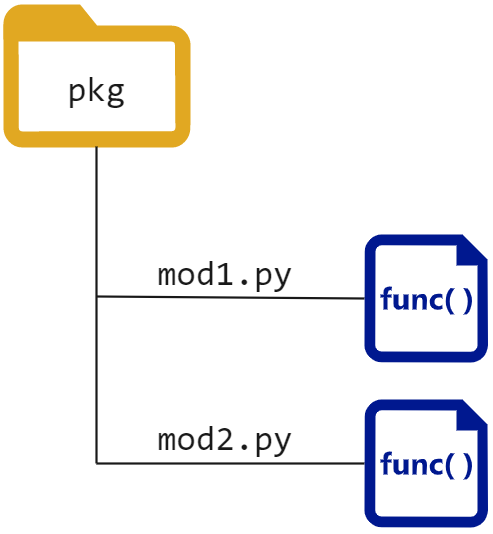Creating a package is quite straightforward, since it makes use of the operating system’s inherent hierarchical file structure. Consider the following arrangement:

<img src="../images/package.png" alt="package" width=200 align="left" />

Here, there is a directory named `pkg` that contains two modules, `mod1.py` and `mod2.py`. The contents of the modules are:

In [41]:
!mkdir pkg

In [42]:
%%writefile pkg/mod1.py
def add(a, b):
    return a + b

class Foo:
    pass

Writing pkg/mod1.py


In [43]:
!ls

'07.1 Modular Programming (Part #1_ Modules).ipynb'    pkg
'07.2 Modular Programming (Part #2_ Packages).ipynb'


In [44]:
%%writefile pkg/mod2.py
def multiply(a, b):
    return a * b

class Bar:
    pass

Writing pkg/mod2.py


Given this structure, if the `pkg` directory resides in a location where it can be found (in one of the directories contained in sys.path), you can refer to the two modules with **dot notation** (`pkg.mod1`, `pkg.mod2`) and import them with the syntax you are already familiar with:

You can technically import the package:

In [6]:
import pkg

In [7]:
pkg

<module 'pkg' from '/mnt/d/class/python_class/03. Modular Programming/pkg/__init__.py'>

Though this is, strictly speaking, a syntactically correct Python statement, it doesn’t do much of anything useful. In particular, it does not place any of the modules in `pkg` into the local namespace:

In [12]:
pkg.mod1

<module 'pkg.mod1' from '/mnt/d/class/python_class/03. Modular Programming/pkg/mod1.py'>

In [13]:
pkg.mod1.add()

TypeError: add() missing 2 required positional arguments: 'a' and 'b'

To actually import the modules or their contents, you need to use one of the forms shown below:

In [14]:
import pkg.mod1, pkg.mod2

pkg.mod1.add(6, 5)
pkg.mod2.multiply(3, 4)

12

In [15]:
from pkg.mod1 import add

add(6, 5)

11

In [16]:
from pkg.mod1 import add as add_numbers

add_numbers(6, 5)

11

<a class="anchor" id="package_init"></a>
## 2. Package Initialization

In [17]:
# removing previously imported modules and packages
del pkg, add, add_numbers

If a file named `__init__.py` is present in a package directory, it is invoked when the package or a module in the package is imported. This can be used for execution of package initialization code, such as initialization of package-level data.

For example, consider the following `__init__.py` file:

In [19]:
%%writefile pkg/__init__.py
print(f'Invoking __init__.py for {__name__}')
A = ['item_1', 'item_2', 'item_3']

Writing pkg/__init__.py


Let’s add this file to the `pkg` directory from the above example:

<img src="../images/init.png" alt="init" width=200 align="left" />

In [20]:
import pkg

In [21]:
# pkg is loaded already, so we have to reload it to make __init__.py be executed again.
from importlib import reload

reload(pkg)

Invoking __init__.py for pkg


<module 'pkg' from '/mnt/d/class/python_class/03. Modular Programming/pkg/__init__.py'>

Now when the package is imported, the global list `A` is initialized:

In [22]:
pkg.A

['item_1', 'item_2', 'item_3']

A module in the package can access the global variable by importing it in turn:

In [25]:
%%writefile pkg/mod1.py
from pkg import A
print(A)

def add(a, b):
    return a + b

class Foo:
    pass

Overwriting pkg/mod1.py


In [26]:
from pkg import mod1

In [27]:
# mod1 is already imported, reloading it to show how print(A) works.
reload(mod1)

['item_1', 'item_2', 'item_3']


<module 'pkg.mod1' from '/mnt/d/class/python_class/03. Modular Programming/pkg/mod1.py'>

In [30]:
mod1.add(2, 3)

5

In [31]:
dir(pkg)

['A',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'mod1',
 'mod2']

`__init__.py` can also be used to effect automatic importing of modules from a package. For example, earlier you saw that the statement `import pkg` only places the name `pkg` in the caller’s local symbol table and doesn’t import any modules. But if `__init__.py` in the `pkg` directory contains the following:

In [1]:
%%writefile pkg/__init__.py
print(f'Invoking __init__.py for {__name__}')
A = ['item_1', 'item_2', 'item_3']
# import pkg.mod1, pkg.mod2
from pkg import mod1, mod2
# import mod1, mod2

Overwriting pkg/__init__.py


In [3]:
import pkg

In [4]:
pkg.mod1.add(1,2)

3

# question???

 import mod1, mod2 !!!!!!! why this doesnt work

Then when you execute `import pkg`, modules `mod1` and `mod2` are imported automatically.

In [35]:
# pkg is loaded already, so we have to reload it to make __init__.py be executed again.
from importlib import reload
import pkg
reload(pkg)


Invoking __init__.py for pkg


<module 'pkg' from '/mnt/d/class/python_class/03. Modular Programming/pkg/__init__.py'>

**Note:** Much of the Python documentation states that an `__init__.py` file must be present in the package directory when creating a package. This was once true. It used to be that the very presence of `__init__.py` signified to Python that a package was being defined. The file could contain initialization code or even be empty, but **it had to be present**.

Starting with **Python 3.3**, Implicit Namespace Packages were introduced. These allow for the creation of a package without any __init__.py file. Of course, **it can still be present if package initialization is needed**. But it is no longer required.

<a class="anchor" id="package_import_*"></a>
## 3. Importing `*` From a Package

You have already seen that when import * is used for a module, all objects from the module are imported into the local symbol table, except those whose names begin with an underscore, as always

The analogous statement for a **package** is this:

```python
from <package_name> import *
```

In [13]:
del mod1, mod2

NameError: name 'mod1' is not defined

In [13]:
%%writefile pkg/__init__.py
print(f'Invoking __init__.py for {__name__}')
A = ['item_1', 'item_2', 'item_3']

Overwriting pkg/__init__.py


In [14]:
pkg.mod1.add(1,2)

3

In [9]:
dir()

['A',
 'In',
 'Out',
 '_',
 '_4',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'mod1',
 'mod2',
 'pkg',
 'quit']

In [10]:
mod1.add(1,2)

3

You might have expected (assuming you had any expectations at all) that Python would dive down into the package directory, find all the modules it could, and import them all. But as you can see, by default that is not what happens.

Instead, Python follows this convention: if the `__init__.py` file in the package directory contains a list named `__all__`, it is taken to be a list of modules that should be imported when the statement from `<package_name>` import `*` is encountered.

In [15]:
%%writefile pkg/__init__.py
print(f'Invoking __init__.py for {__name__}')
A = ['item_1', 'item_2', 'item_3']

__all__ = ['mod1']

Overwriting pkg/__init__.py


In [1]:
from pkg import *

Invoking __init__.py for pkg
['item_1', 'item_2', 'item_3']


In [2]:
dir()

['In',
 'Out',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'mod1',
 'quit']

Using `import *` still isn’t considered terrific form, any more for packages than for modules. But this facility at least gives the creator of the package some control over what happens when `import *` is specified. (In fact, it provides the capability to disallow it entirely, simply by declining to define `__all__` at all. As you have seen, the default behavior for packages is to import nothing.)

By the way, `__all__` can be defined in a module as well and serves the same purpose: to control what is imported with import `*`. For example, modify `mod1.py` as follows:

In [39]:
%%writefile pkg/mod1.py
__all__ = ['foo']

def foo():
    print('[mod1] foo()')

class Foo:
    pass

Overwriting pkg/mod1.py


Now `from pkg.mod1 import *` statement from pkg.mod1 will only import what is contained in `__all__`.

**Summary:**

`__all__` is used by both packages and modules to control what is imported when `import *` is specified. But the default behavior differs:

- For a package, when `__all__` is not defined, `import *` does not import anything.
- For a module, when `__all__` is not defined, `import *` imports everything (except—you guessed it—names starting with an underscore).

<a class="anchor" id="subpackages"></a>
## 4. Subpackages

Packages can contain nested subpackages to arbitrary depth. For example, let’s make one more modification to the example package directory as follows:

<img src="../images/sub_pkg.png" alt="subpackage" width=500 align="left" />

Importing still works the same as shown previously. Syntax is similar, but additional **dot notation** is used to separate **package** name from **subpackage** name:

In [3]:
!mkdir pkg/sub_pkg_1

In [6]:
%%writefile pkg/sub_pkg_1/mod3.py
def sub_foo():
    print('[mod3.py] foo()')

class SubFoo:
    pass

Overwriting pkg/sub_pkg_1/mod3.py


In [7]:
import pkg.sub_pkg_1.mod3

In addition, a module in one subpackage can reference objects in a **sibling subpackage** (in the event that the sibling contains some functionality that you need). For example, suppose you want to import and execute function foo() (defined in module mod1) from within module mod3. You can either use an **absolute import**:

In [12]:
%%writefile pkg/sub_pkg_1/mod4.py
def sub_bar():
    print('[mod2.py] baz()')

class SubBar:
    pass

from pkg.sub_pkg_1.mod3 import sub_foo
sub_foo()

Overwriting pkg/sub_pkg_1/mod4.py


In [1]:
from pkg.sub_pkg_1 import mod4

Invoking __init__.py for pkg
[mod3.py] foo()


Or you can use a **relative import**, where `..` refers to the package one level up. From within `mod1.py`, which is in subpackage `sub_pkg`,

- `..` evaluates to the parent package (`pkg`), and
- `..sub_pkg` evaluates to subpackage `sub_pkg` of the parent package.

In [2]:
!mkdir pkg/sub_pkg_2

In [4]:
%%writefile pkg/sub_pkg_2/mod5.py
from .. import sub_pkg_1
print(sub_pkg_1)

from ..sub_pkg_1.mod3 import sub_foo
sub_foo()

Overwriting pkg/sub_pkg_2/mod5.py


In [5]:
from pkg.sub_pkg_2 import mod5

<module 'pkg.sub_pkg_1' (namespace)>
[mod3.py] foo()


<a class="anchor" id="summary"></a>
## Summary

In modularization section, the following topics are covered:

- How to create a Python module
- Locations where the Python interpreter searches for a module
- How to obtain access to the objects defined in a module with the import statement
- How to create a module that is executable as a standalone script
- How to organize modules into packages and subpackages
- How to control package initialization